# QUESTIONS
- consider adding pipelines?
- feature engineering?
- fitting transformers?
- go into detail on why DT's > log and KNN

Data Preparation for Machine Learning
We define this objective as:

Applying appropriate preprocessing and feature engineering steps to tabular data in preparation for predictive modeling

This builds on the data preparation requirement from the Phase 2 project; you still need to ensure that you have a strategy for dealing with missing and non-numeric data.

For the Phase 3 project, make sure you also consider:

Preventing Data Leakage: As you prepare data for modeling, make sure that you are correctly applying data preparation techniques so that your model's performance on test data realistically represents how it would perform on unseen data. For scikit-learn transformers specifically, make sure that you do not fit the transformer on the test data. Instead, fit the transformer on the training data and use it to transform both the train and test data.
Scaling: If you are using a distance-based model algorithm (e.g. kNN or logistic regression with regularization), make sure you scale your data prior to fitting the model.
Feature engineering is encouraged but not required for this project.

Exceeds Objective
Goes above and beyond with data preparation, such as feature engineering or using pipelines

Relevant examples of feature engineering will depend on your choice of dataset and business problem.

Pipelines are the best-practice approach to data preparation that avoids leakage, but they can get complicated very quickly. We therefore do not recommend that you use pipelines in your initial modeling approach, but rather that you refactor to use pipelines if you have time.

Meets Objective (Passing Bar)
Successfully prepares data for modeling, using a final holdout dataset that is transformed by (but not fitted on) transformers used to prepare training data AND scaling data when appropriate

See the descriptions above for explanations of how to use transformers and scaling.

Nonparametric and Ensemble Modeling
This builds on the linear modeling requirement from the Phase 2 project. Your project should consider the different types of models that have been covered in the course so far and whether they are appropriate or inappropriate for the dataset and business case you are working with.

Your final model can still be a linear model (e.g. logistic regression) but you should explore at least one nonparametric model (e.g. decision tree) as well and articulate why one or the other is a better approach.

Exceeds Objective
Goes above and beyond in the modeling process, such as articulating why a given model type is best suited to the problem or correctly using scikit-learn models not covered in the curriculum

Another way you might go above and beyond would be to create custom Python classes, possibly inheriting from scikit-learn classes.

Meets Objective (Passing Bar)
Uses at least two types of scikit-learn model and tunes at least one hyperparameter in a justifiable way without any major errors

See the "Iterative Approach to Modeling" section above for a more-lengthy explanation.

Once again, ideally you would include written justifications for each model iteration, but at minimum the iterations must be justifiable.

For an explanation of "major errors", see the description under "Approaching Objective".

In [92]:
# Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

pd.set_option("display.max_columns", 100)

Business Understanding

A pass grade is a 60% (D) or higher for this school district

In [93]:
# reading in math and language datasets
mat  = pd.read_csv('data/student-mat.csv', sep=';')
lan = pd.read_csv('data/student-por.csv', sep=';')

# adding column to distiguish subject
mat['subject'] = 'Math'
lan['subject'] = 'Language'

#concatenating into one df
df = pd.concat([mat,lan])

#looking at first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Math


In [94]:
# checking rows and columns
df.shape

(1044, 34)

## Preprocessing

In [95]:
# Checking dtypes. Will need to change some numeric to str type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [96]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

In [97]:
### NUMERIC COLUMNS
# 3 age - student's age (numeric: from 15 to 22)
# 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
# 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
# 30 absences - number of school absences (numeric: from 0 to 93)
#### STRING COLUMNS
# 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
# 2 sex - student's sex (binary: 'F' - female or 'M' - male)
# 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
# 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
# 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
# 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
# 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
# 16 schoolsup - extra educational support (binary: yes or no)
# 17 famsup - family educational support (binary: yes or no)
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# 19 activities - extra-curricular activities (binary: yes or no)
# 20 nursery - attended nursery school (binary: yes or no)
# 21 higher - wants to take higher education (binary: yes or no)
# 22 internet - Internet access at home (binary: yes or no)
# 23 romantic - with a romantic relationship (binary: yes or no)

In [98]:
cols_to_convert = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
                   'famsup','paid','activities','nursery','higher','romantic','internet']

In [99]:
# Now all dtypes are as they should be for modeling
for col in cols_to_convert:
    df[col] = df [col].astype('str')

In [101]:
#Changing outcome variable to be binary based on pass/fail status. < 60% or >= 60%
def create_binary_outcome(x):
    if x >= 12:
        return 1 #Pass
    else:
        return 0 #Fail

df['final_grade'] = df['G3'].apply(create_binary_outcome)

In [102]:
# looking at the distribution of the outcome variable (pass/fail). class is balanced
balance = df.final_grade.value_counts(normalize=True)
print('Class Distribution:\nFail: ','{:0.1%}'.format(balance[0]))
print('Pass: ','{:0.1%}'.format(balance[1]))

Class Distribution:
Fail:  51.1%
Pass:  48.9%


In [103]:
# Dropping columns that are not of interest. We want this dataset to be generalized to multiple schools so don't need school type
# also dropping mid period grades and absences / failures as this is too predictive & we want to predict for the beginning of the school year
cols_to_drop = ['school','G1','G2','G3','failures','absences']
df = df.drop(cols_to_drop, axis=1)

In [104]:
# Transforming categorical variables into dummies. don't need to drop first as multicollinearity is not an issue
df = pd.get_dummies(df)

In [105]:
# Splitting data into Features and Target
X = df.drop('final_grade',axis = 1)
y = df['final_grade']

In [106]:
# Train Test Split, running models on Training data to assess performance on Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

### Creating Function to evaluate models

In [107]:
def model_eval(model,X_train,y_train,X_test,y_test,cm=False):
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    # Accuracy= Number of True Positives + True Negatives / Total Observations
    print('Accuracy - Out of all the predictions that were made, how many were correct?')
    print('Training Accuracy: ', '{:0.3%}'.format(accuracy_score(y_train, y_hat_train)))
    print('Testing Accuracy: ', '{:0.3%}'.format(accuracy_score(y_test, y_hat_test)))
    
    if cm == True:
        plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Greens)

### Running First Model

Accuracy - Out of all the predictions that were made, how many were correct?
Training Accuracy:  73.677%
Testing Accuracy:  68.116%

We are getting a convergence warning so we need to scale our data.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


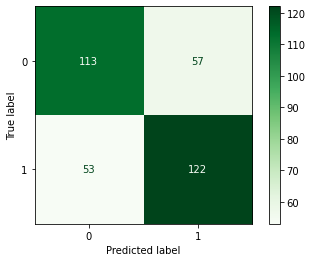

In [109]:
# Running First Model, Logistic Regression. Accounting for imbalance by calling class_weight
logreg = LogisticRegression()
model_1 = logreg.fit(X_train, y_train)

model_eval(model_1,X_train,y_train,X_test,y_test, cm=True)

print('''\nWe are getting a convergence warning so we need to scale our data.''')

In [110]:
# need to scale data that's why we are getting a convergence warning
scaler = StandardScaler()

#Fit and transform on the training dataset
X_train_scaled = scaler.fit_transform(X_train)

#transfrorm only on the test dataset
X_test_scaled  = scaler.transform(X_test)

In [112]:
# fitting second model with scaled data
model_scaled = logreg.fit(X_train_scaled, y_train)

In [160]:
# Evaluating model
model_eval(model_scaled, X_train_scaled, y_train, X_test_scaled, y_test)
print('''\nxxx''')

Accuracy - Out of all the predictions that were made, how many were correct?
Training Accuracy:  73.247%
Testing Accuracy:  68.406%

xxx


In [116]:
# Looks like the C value is 1.0 and solver is lbfgs, with an l2 penalty. Perhaps we can play around with these to improve the model
# Let's first look at decision trees
model_2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Decision Tree

In [123]:
# Checking if a Decision Tree can outperform Logistic Regression:
dt = DecisionTreeClassifier()
model_dt1 = dt.fit(X_train, y_train)

Accuracy - Out of all the predictions that were made, how many were correct?
Training Accuracy:  100.000%
Testing Accuracy:  60.290%

Training models are performing exceptionally well while the testing is only at 60% accuracy. model is severly overfitting


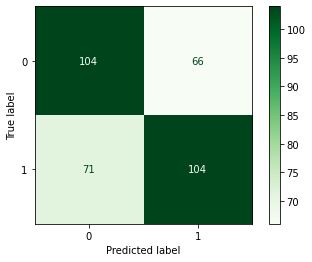

In [124]:
model_eval(model_dt1, X_train, y_train, X_test, y_test, cm = True)
print('\nTraining models are performing exceptionally well while the testing is only at 60% accuracy. model is severly overfitting')

In [125]:
print(''' this dataset has {} columns, which may be the cause of overfitting. lets change the max features'''.format(len(X.columns)))

 this dataset has 54 columns, which may be the cause of overfitting. lets change the max features


In [126]:
# grabbing importance of features from previous model and turning to df
feat_imp = pd.concat([pd.DataFrame(X_train.columns.values, columns = ['feature']),pd.DataFrame(model_dt1.feature_importances_, columns= ['value'])] ,axis = 1)
feat_imp.sort_values(by='value',ascending=False, inplace=True)
feat_imp.head()

,feature,value
0,age,0.074301
1,Medu,0.069210
9,Walc,0.067220
47,higher_yes,0.059534
2,Fedu,0.045598


In [141]:
X_train_subset = X_train[feat_imp.head(49).feature.to_list()]
X_test_subset  =  X_test[feat_imp.head(49).feature.to_list()]

In [142]:
model_dt_subset = dt.fit(X_train_subset, y_train)

In [143]:
model_eval(model_dt_subset, X_train_subset, y_train, X_test_subset, y_test)
print('\nTest rates go up , but still need to do more')

Accuracy - Out of all the predictions that were made, how many were correct?
Training Accuracy:  100.000%
Testing Accuracy:  61.449%

Test rates go up , but still need to do more


# Random Forest Model

In [144]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier()
model_rf = forest.fit(X_train_subset,y_train)

# Evaluate
model_eval(model_rf,X_train_subset,y_train,X_test_subset,y_test)
print('\nTesting accuracy goes up. still overfitting. is the subset data doing better?')

Accuracy - Out of all the predictions that were made, how many were correct?
Training Accuracy:  100.000%
Testing Accuracy:  69.275%

Testing accuracy goes up. still overfitting. is the subset data doing better?


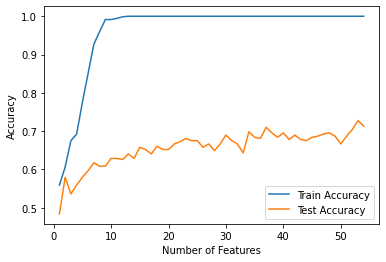

In [167]:
# Seeing if Testing Data accuracy increases with less features
features = range(1,55)
train_results = []
test_results = []

for feature in features:
    X_train_subset_test = X_train[feat_imp.head(feature).feature.to_list()]
    X_test_subset_test = X_test[feat_imp.head(feature).feature.to_list()]
    
    forest = RandomForestClassifier()
    forest.fit(X_train_subset_test, y_train)
    
    y_hat_train_test = forest.predict(X_train_subset_test)
    y_hat_test_test = forest.predict(X_test_subset_test)

    train_acc = accuracy_score(y_train, y_hat_train_test)
    test_acc = accuracy_score(y_test, y_hat_test_test)

    train_results.append(train_acc)
    test_results.append(test_acc)

plt.figure(figsize=(6,4))
plt.plot(features, train_results, label='Train Accuracy')
plt.plot(features, test_results, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.legend()
plt.show()

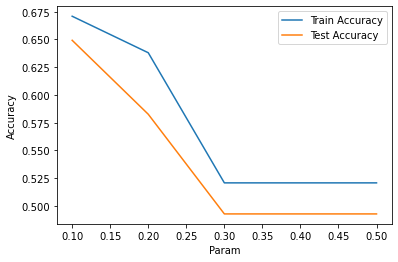

In [159]:
# Identify the optimal number of features for given data
param = [x/10 for x in range(1,6)]
train_results = []
test_results = []

for param_subset in param:
    forest = RandomForestClassifier(min_samples_leaf=param_subset)
    forest.fit(X_train2, y_train)
    
    y_hat_train_test2 = forest.predict(X_train2)
    y_hat_test_test2 = forest.predict(X_test2)

    train_acc = accuracy_score(y_train, y_hat_train)
    test_acc = accuracy_score(y_test, y_hat_test)

    train_results.append(train_acc)
    test_results.append(test_acc)

plt.figure(figsize=(6,4))
plt.plot(param, train_results, label='Train Accuracy')
plt.plot(param, test_results, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Param')
plt.legend()
plt.show()

In [36]:
model_rf.estimators_[0] # checking the deeeeets on the first tree in the random forest

DecisionTreeClassifier(max_features='auto', random_state=1091169493)

# GRIDSEARCH

In [168]:
# Looking at all params we can tune
forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [169]:
# creating param grid to apply to random forest model
rf_param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None,5,7,8],
    'min_samples_split':[0.1,0.2,0.3,0.8,0.9],
    'min_samples_leaf':[0.1,0.2,0.3]
                }

In [170]:
# Instantiate GridSearchCV
model_cv = GridSearchCV(model_rf, rf_param_grid, scoring='accuracy')

# Fit to the data
model_cv.fit(X_train_subset, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 8],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.8, 0.9]},
             scoring='accuracy')

In [171]:
model_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

In [173]:
model_eval(model_cv,X_train,y_train,X_test,y_test)

Accuracy - Out of all the predictions that were made, how many were correct?
Training Accuracy:  50.501%
Testing Accuracy:  48.696%


In [43]:
print("""
The parameter tuning using GridSearchCV improved our model's performance by over 20%, from ~44% to ~66%. The model also shows no signs of overfitting, as evidenced 
by the close training and testing scores. Grid Search does not gaurantee that we will always find the globally optimal combination of parameter values. Since 
it only exhaustively searches through the parameter values we provide, not every possible combination of every possible value for each parameter is tested. This means 
that the model is only as good as the possible combinations of the parameters we include in our parameter grid.
""")


The parameter tuning using GridSearchCV improved our model's performance by over 20%, from ~44% to ~66%. The model also shows no signs of overfitting, as evidenced 
by the close training and testing scores. Grid Search does not gaurantee that we will always find the globally optimal combination of parameter values. Since 
it only exhaustively searches through the parameter values we provide, not every possible combination of every possible value for each parameter is tested. This means 
that the model is only as good as the possible combinations of the parameters we include in our parameter grid.



In [174]:
# When tackling overfitting, the model's accuracy falls to below our logistic regression model (model 1). lets go back to that and tune.
# Looking at parameters for logistic regression
model_2.get_params().keys()

In [175]:
log_param_grid = {
    'C':[1,1e3,1e4],
    'fit_intercept':[True,False],
#     'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }

In [176]:
# Instantiate GridSearchCV
log_cv = GridSearchCV(model_2, log_param_grid, scoring='accuracy')

# Fit to the data
log_cv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 1000.0, 10000.0],
                         'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [177]:
log_cv.best_params_

{'C': 1, 'fit_intercept': False, 'solver': 'newton-cg'}

In [182]:
## this is the sameeeee result
model_eval(log_cv,X_train_scaled,y_train,X_test_scaled,y_test)

Accuracy - Out of all the predictions that were made, how many were correct?
Training Accuracy:  73.104%
Testing Accuracy:  69.565%
